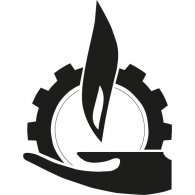

***

<center>
    <b>Module: Graph Theory, Summer 21/22 Assessment.</b>
    <br>
    <b>Student: David Mulhern</b>
    <br>
    <b>ID: G00268549.</b>
    <br>
    <b>Lecturer: Dr. Ian McLoughlin.</b>
</center>

***

## <center>Heapsort.</center>

***


# What is it?

***

<p>In short, heap sort is a commonly used <i>sorting algorithm/technique.</i>
But, in order to understand how this sorting algorithm works, we must first address and clarify what a "heap" is. Let's look at and discuss this.</p>

# Heap.

***

<p>A heap is an ordered tree-based data structure. Most commonly, a heap is implemented using a binary tree. A binary tree is built using nodes. There is 4 types of nodes:</p>
<li>
    Root Node.
</li>
<li>
    Parent Node.
</li>
<li>
    Child Node.
</li>
<li>
    Leaf Node.
</li>
    
<p>All though not all nodes are implicitly one type, one example being that a node can be both a parent and a child node.
The root node is the first 'parent node'. A parent node has a maximum of two children. The nodes at the end which no longer have any child(ren) are reffered to as leaf nodes.</p>

***

# Binary tree Illustration.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


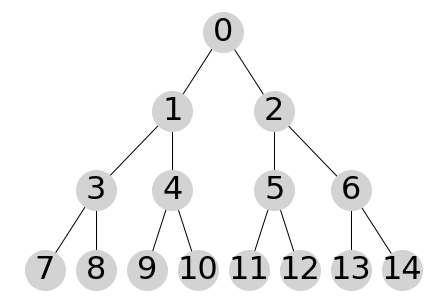

In [1]:
# Importing matplotlib, allowing plotting.
import matplotlib.pyplot as plt
# Importing networkx to illustrate graphs.
import networkx as nx
# Importing to allow mathematical functions.
import math

def drawtree(L, highlight=None):
  # Create a fully balanced binary tree.
  T = nx.balanced_tree(2, math.floor(math.log(len(L), 2)))
  # Remove nodes beyond the length of L.
  T.remove_nodes_from(list(T.nodes)[len(L):])
  # Relabel the nodes with elements of L.
  T = nx.relabel_nodes(T, dict(zip(T.nodes, L)), copy=True)
  # Get nice positions for the nodes in the picture.
  pos = nx.drawing.nx_pydot.graphviz_layout(T, prog="dot")
  # Draw the graph.
  nx.draw(T, pos, with_labels=True, node_color='lightgrey', node_size=1600, font_size=32)
  # Highlight nodes if needed.
  if highlight:
    nx.draw_networkx(T.subgraph([i for i in T.nodes if i in highlight]), pos=pos, node_color='pink', node_size=1600, font_size=32)

# Length of a list, in this case, height 4.
n = 15
# Create a list of length n.
L = list(range(n))
# Show the list.
print(L)
# Draw the tree from L.
drawtree(L)

# Heap Types.

***

<p>Parent and children nodes must maintain some order of values, this will define the type of heap, thus heaps can be constructed in two ways:
<ol>
    <li>
        Max Heap.
    </li>
    <li>
       Min Heap.
    </li>
</ol>

<b>Max Heap:</b> The value of the parent is always more than the value of the children. This will ensure that the root node will be the maximum value in the entire heap.</p>
<p>
    <b>Min Heap:</b> The value of the parent is always less than the value of the children. This will ensure that the root node will be the minimum value in the entire heap.</p>
</p>

# How does heap sort work?

***

<p>
    Now that we have covered what exactly a heap is, let's discuss how the heap sort algoritm works and later look at some code implementations and put this methodology to practice.
</p>

<b>Reference:  </b>[Heap sort wikipedia.](https://en.wikipedia.org/wiki/Heapsort)

<p>
    As defined by wikipedia, heap sort is a comparison-based sorting algorithm. Meaning, we take an array of random integers and we want to sort them into order. We visualise this using a binary tree we construct from an array or list.
    Take for example the array: [6, 9, 11, 2, 5, 13, 3]. How can we confirm the order of parent and children?<br><br>
    We refer to the index of any element the 'ith', so take for this example <b>9</b> being <b>i</b>, the element at index <b>1</b>. The rules is as follows:<br><br>
    The index (2*i)+1 will return the index of the left child<br> 
    <b> (2*1) + 1 = 3, hency left child is at index 3 - Which is the 2, correct! </b><br>
    The index (2*i)+2 will return the index of the right child<br> 
    <b> (2*1) + 2 = 4, hency left child is at index 4 - Which is the 5, correct!</b>
</p>

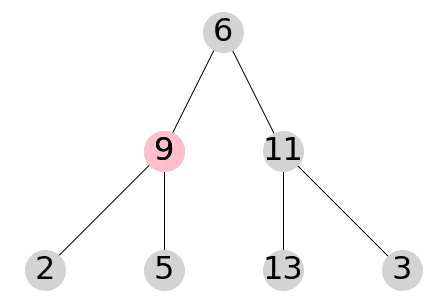

In [2]:
# Given array.
L= [6, 9, 11, 2, 5, 13, 3]
drawtree(L, [9])

<p>In our upcoming code, there are two major operators/functions at work here:</p>
<ol>
    <li>
        heapify.
    </li>
    <li>
        heapSort.
    </li>
</ol>

***

#### Heapify function.

***

<p>
    The objective here is to first create a max heap of the tree. Meaning we want to order the heap, having the largest values starting from the topmost node and have the next in line (left to right) values descend down to the leaf nodes. We achieve this by running this function on all of the <i>none-leaf</i> elements in the heap and swapping them with their children where necessary. Recursion comes into play here and we continue swapping, thereby pushing lower values out the the leafs, also known as "sifting down".<br>
    Once this process is complete, we are left with a <b>Max Heap.</b>
</p>

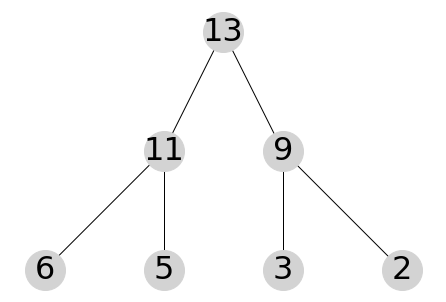

In [3]:
L= [13, 11, 9, 6, 5, 3, 2]
drawtree(L)

***

#### Heap Sort function.

***

<p>This function will get passed an unsorted array. It first will pass the array to the previously made heapify function, thus returning a max heap.<br>
Now, more recursion takes place. Once we have the first max heap, this function will swap the largest value (root node) with the last item in the heap. It will then remove the last item(now the largest) from the next iteration. Next, you've guessed it! We run another heapify on the now shortend array and continue this process, pushing the largest element to the end of the array and decreasing the size of the heap by 1. See figure below as an illustrations on the first swap</p>


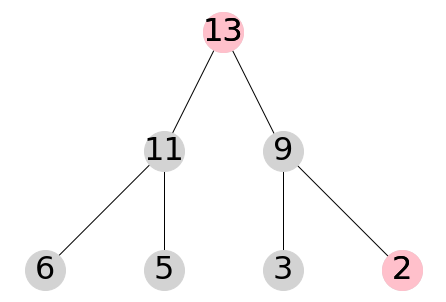

In [4]:
L= [13, 11, 9, 6, 5, 3, 2]
drawtree(L, [13, 2])

## Swapping nodes

***

<p>heapSort function has recieved this Max Heap array: [13, 11, 9, 6, 5, 3, 2]

It will now swap the largest value at the root for the last value in the heap and thereafter remove the last element for the next iteration.<p>

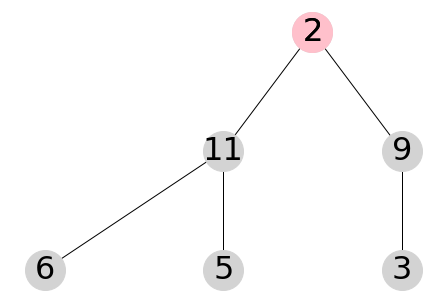

In [5]:
L= [2, 11, 9, 6, 5, 3]
drawtree(L, [2])

## Remove a node decrease heap by one, begin process again.

***

<p>The array now looks like this: L = [2, 11, 9, 6, 5, 3, <b>13</b>] and as since the size of the heap has been reduced by one, only the first 6 elements will be considered in the next iteration.</p>

<p>This process will iterate enough times to cover each element in the heap, reducing heap size by one on every successful iteration. Once all elements of array (L) have been swapped, removed and the heapify function is called, our sorting algorithm is complete. This is how heapsort works.<br><br>
    
<p>All iterations complete:
    newArray = [2, 3, 5, 6, 9, 11, 13]</p>


<b>Reference:</b> [Brief descriptive video. Credit: Michael Sambol](https://www.youtube.com/watch?v=2DmK_H7IdTo)

## Heapsort algorith, using Python.

***

<p> First we must implement the two previously mentioned functions: </p>

##### heapify().

In [6]:
def heapify(myArr, length, i): # (array, length, root).
    # Start by finding the largest value among the root and children.
    largest = i
    left = 2 * i + 1 # value of left child.
    right = 2 * i + 2 # value of right child.
    
    # Assigning the largest value if one of the children are larger.
    if left < length and myArr[i] < myArr[left]:
        largest = left
        
    if right < length and myArr[largest] < myArr[right]: # This checks if right was in fact larger than both left and parent.
        largest = right
        
    # We must also check that the root was not the largest, swap and proceed to heapify.
    if largest != i:
        myArr[i], myArr[largest] = myArr[largest], myArr[i] # Swap.
        # Then heapify
        heapify(myArr, length, largest)

##### heapSort().

In [7]:
def heapSort(myArr):
    length = len(myArr)
    
    # First, build a max heap.
    for i in range(n//2, -1, -1): # n//2 assign the floor value, division of two.
        heapify(myArr, length, i)
        
    # Swapping the root (largest value) node.
    for i in range(length - 1, 0, -1):
        myArr[i], myArr[0] = myArr[0], myArr[i]
        
        # Run heapify on root element - 0.
        heapify(myArr, i, 0)

## Heapsort algorithm at work.

*** 


In [8]:
print("Sorting list: [2, 11, 9, 6, 5, 3]")
L= [2, 11, 9, 6, 5, 3]
heapSort(L)
length = len(L)
print("Now sorted: ")
for i in range(length):
    print("%d " % L[i], end='')

Sorting list: [2, 11, 9, 6, 5, 3]
Now sorted: 
2 3 5 6 9 11 